# *Convolution Neural Network*

## *Data Cleaning*

In [5]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for plotting
import os

In [6]:
from keras.preprocessing.image import load_img

#### Specifing the dataset folder path

In [7]:
dataset_path = '../hod_classification_dataset'

In [18]:
img = load_img('../hod_classification_dataset/fire/0NGUCAB2BJM5.jpg', target_size=(64, 64))
img
print(type(img))

<class 'PIL.Image.Image'>


#### Another way to open an image

In [19]:
from PIL import Image

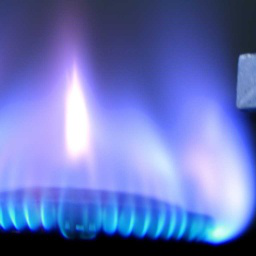

In [21]:
img = Image.open('../hod_classification_dataset/fire/0NGUCAB2BJM5.jpg')
type(img)
img

#### Check the image via opening and creating list

In [22]:

images_list = []
classes_list = []

for classes in os.listdir(dataset_path):
    for images in os.listdir(os.path.join(dataset_path,classes)):
        try:
            if Image.open( os.path.join(dataset_path+'/'+classes, images)):
                images_list.append(os.path.join(dataset_path+'/'+classes, images))
                if classes == 'fire':
                    classes_list.append(0)
                elif classes == 'gun':
                    classes_list.append(1)
                elif classes == 'knife':
                    classes_list.append(2)
                else:
                    continue

        except Exception as e:
            print(e)
            continue
        print(images,'....', classes )

022951SE0RN8.jpg .... fire
05203CEOS1CZ.jpg .... fire
07AJW37034WC.jpg .... fire
08RCC9B1CK67.jpg .... fire
0902IF2GUYJ9.jpg .... fire
0A04VKFOGEU3.jpg .... fire
0B7QAG0EHMYH.jpg .... fire
0CL5SPU9PUS3.jpg .... fire
0DKGAAI45ZUT.jpg .... fire
0G0SCTZHEATP.jpg .... fire
0L227P7YPJKW.jpg .... fire
0NGUCAB2BJM5.jpg .... fire
0OZ8BSCLBRVN.jpg .... fire
0PK158ZKFOO6.jpg .... fire
0RVFTNBUD250.jpg .... fire
0SM0X020RX37.jpg .... fire
0T57TEWVN7Q8.jpg .... fire
0TEVLUPIXQ3T.jpg .... fire
0TIEPJ1NTMYJ.jpg .... fire
0TKNRTQ60YDL.jpg .... fire
0X01LGG1HYNB.jpg .... fire
0X9W49HHIYVX.jpg .... fire
0XXJY8WLGRQH.jpg .... fire
0Y7US0VQVM6L.jpg .... fire
0YN1ENFXVXU2.jpg .... fire
0YZEE3XDCYJP.jpg .... fire
0ZCWDDF8KOUJ.jpg .... fire
1.jpg .... fire
10.jpg .... fire
100.jpg .... fire
101.jpg .... fire
102.jpg .... fire
10220Q0HMOVV.jpg .... fire
103.jpg .... fire
104.jpg .... fire
105.png .... fire
106.jpg .... fire
107.jpg .... fire
108.jpg .... fire
109.jpg .... fire
11.jpg .... fire
110.jpg .... f

In [23]:
print(images_list[7000],'....', classes_list[7000])

../hod_classification_dataset/knife\3SM7OR6OQJPQ.jpg .... 2


### Creating dataFrame

In [27]:
df = pd.DataFrame()
df['images'] = images_list
df['labels'] = classes_list

In [28]:
df.head(-5)

images  labels
0     ../hod_classification_dataset/fire\022951SE0RN...       0
1     ../hod_classification_dataset/fire\05203CEOS1C...       0
2     ../hod_classification_dataset/fire\07AJW37034W...       0
3     ../hod_classification_dataset/fire\08RCC9B1CK6...       0
4     ../hod_classification_dataset/fire\0902IF2GUYJ...       0
...                                                 ...     ...
9816  ../hod_classification_dataset/knife\ZVP6L3OWEQ...       2
9817  ../hod_classification_dataset/knife\ZWDILXUS32...       2
9818  ../hod_classification_dataset/knife\ZWOFAW91BG...       2
9819  ../hod_classification_dataset/knife\ZXAPTDSN2Q...       2
9820  ../hod_classification_dataset/knife\ZXU8WIUC4B...       2

[9821 rows x 2 columns]

In [30]:
df.to_excel('./dataframe/hod.xlsx', index=False)

#### saving the dataframe so the  next time it is loaded, it will be in

In [31]:
# read the dataframe 
df = pd.read_excel('./dataframe/hod.xlsx')

In [32]:
# Shuffle the dataframe so the images are in random order
df = df.sample(frac=1).reset_index(drop=True)
df.head(-5)

images  labels
0     ../hod_classification_dataset/fire\U5GOX1W5QZH...       0
1     ../hod_classification_dataset/knife\68NT6AU6QN...       2
2       ../hod_classification_dataset/fire\fire.157.png       0
3       ../hod_classification_dataset/fire\fire.627.png       0
4     ../hod_classification_dataset/gun\HOIPAGBXT7FX...       1
...                                                 ...     ...
9816  ../hod_classification_dataset/gun\W2I3DGRXND92...       1
9817  ../hod_classification_dataset/gun\DDT4YRDD9E0T...       1
9818  ../hod_classification_dataset/knife\images (45...       2
9819  ../hod_classification_dataset/gun\1CQRIEPIT347...       1
9820  ../hod_classification_dataset/gun\YKEV9NP41Y0H...       1

[9821 rows x 2 columns]

## Visualizing the images i.e EDA

In [33]:
import random

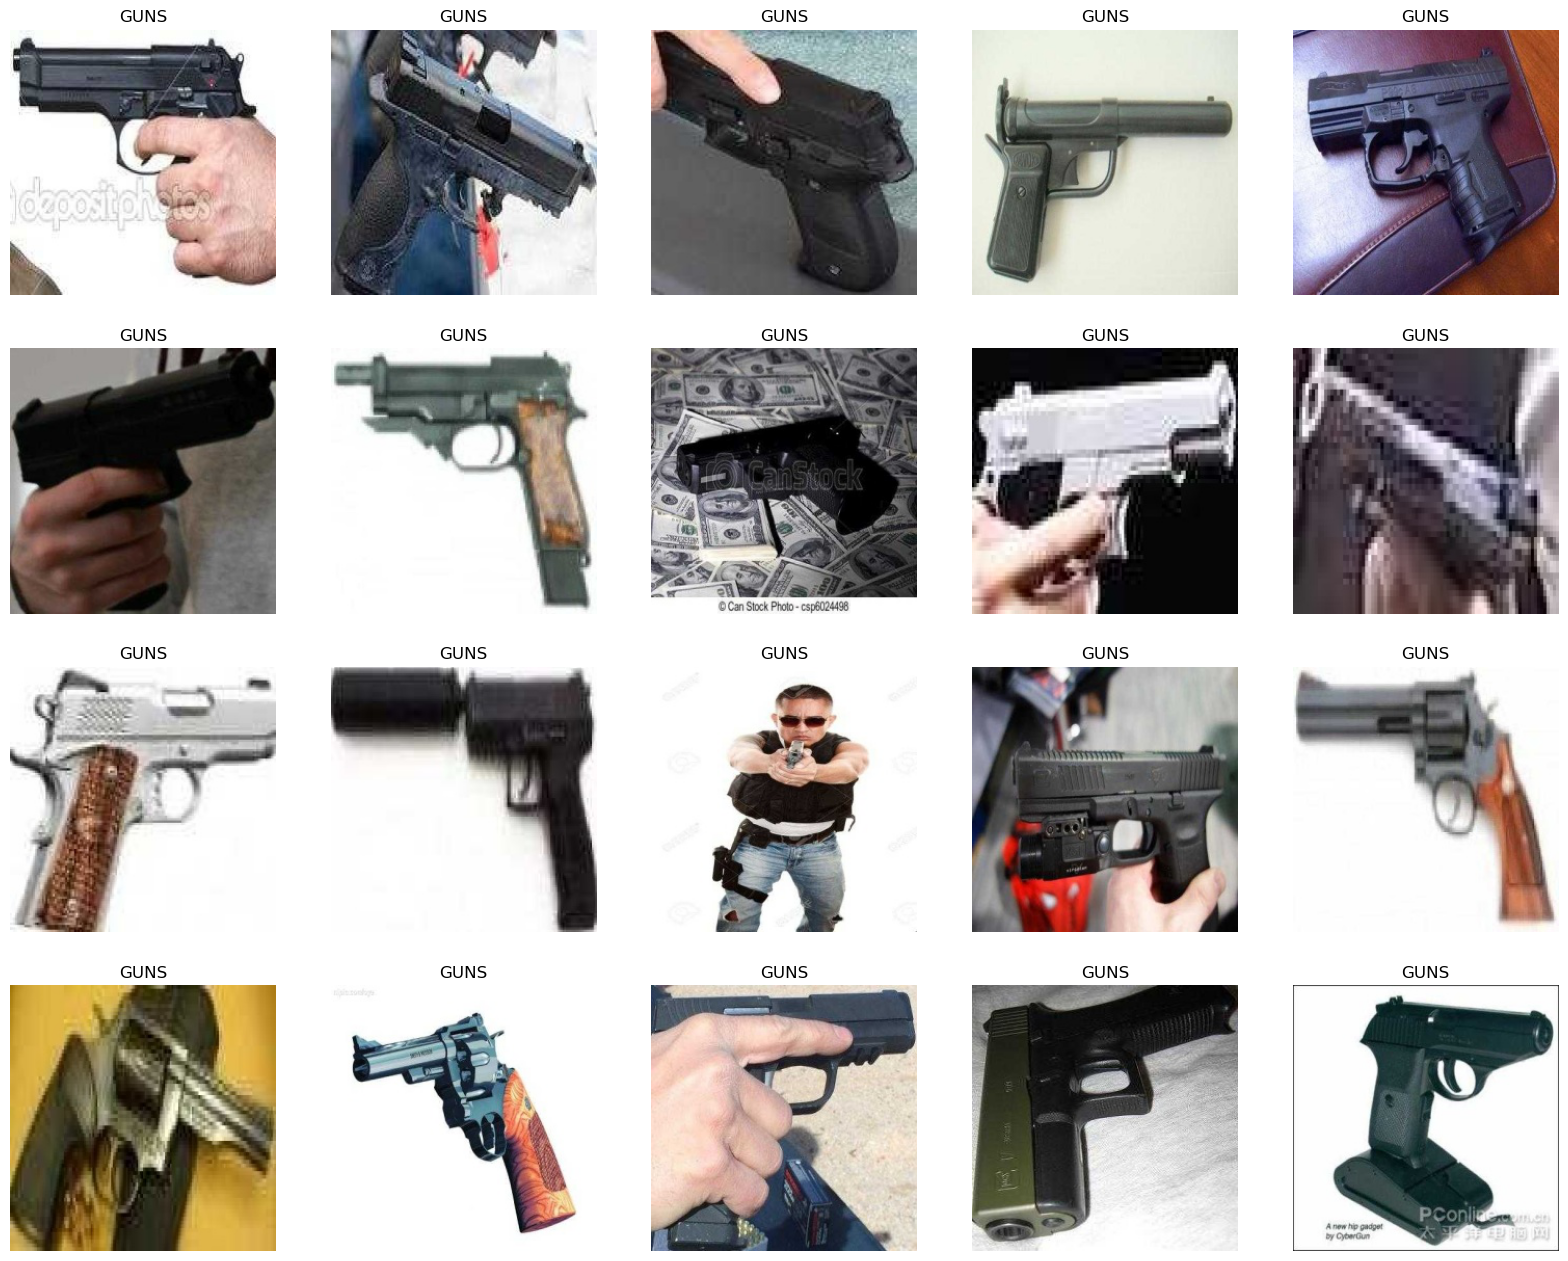

In [34]:
# Display the Images Grid
plt.figure(figsize=(20,20)) 
tem_gun = df[df['labels'] == 1]['images']# fetch the gun image from dataframe
start_index = random.randint(0, len(tem_gun) ) # generate random number between 0 and len(tem_gun)
files = tem_gun[start_index: start_index + 20] # select 20 images 


for index, file in enumerate(files):
    plt.subplot(5,5, index + 1)
    img = load_img(file, target_size=(256, 256)) # read image This is keras module 
    img = np.array(img) # converting img to numpy array
    plt.imshow(img)
    plt.title('GUNS')
    plt.axis('off') # this will not show any x or y axis

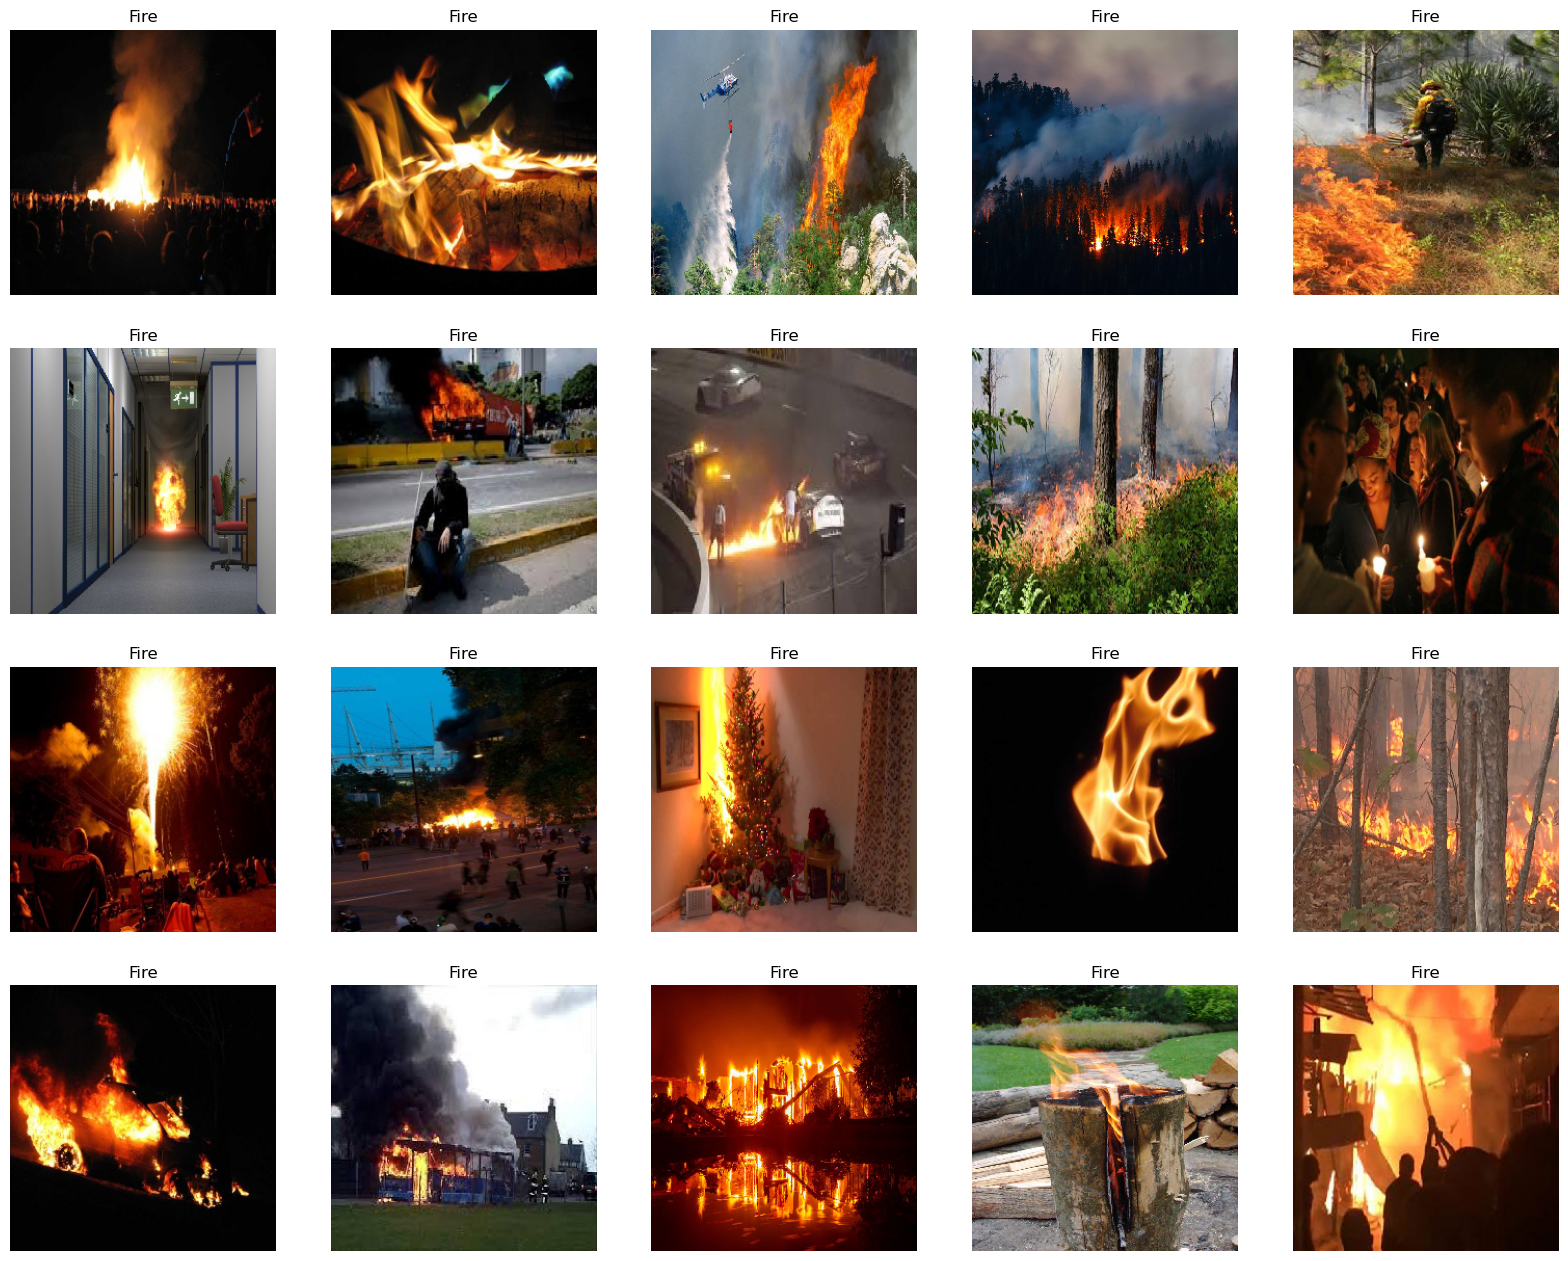

In [35]:
# Display the Images Grid
plt.figure(figsize=(20,20)) 
tem_gun = df[df['labels'] == 0]['images']# fetch the gun image from dataframe
start_index = random.randint(0, len(tem_gun) ) # generate random number between 0 and len(tem_gun)
files = tem_gun[start_index: start_index + 20] # select 20 images 


for index, file in enumerate(files):
    plt.subplot(5,5, index + 1)
    img = load_img(file, target_size=(256, 256)) # read image This is keras module 
    img = np.array(img) # converting img to numpy array
    plt.imshow(img)
    plt.title('Fire')
    plt.axis('off') # this will not show any x or y axis

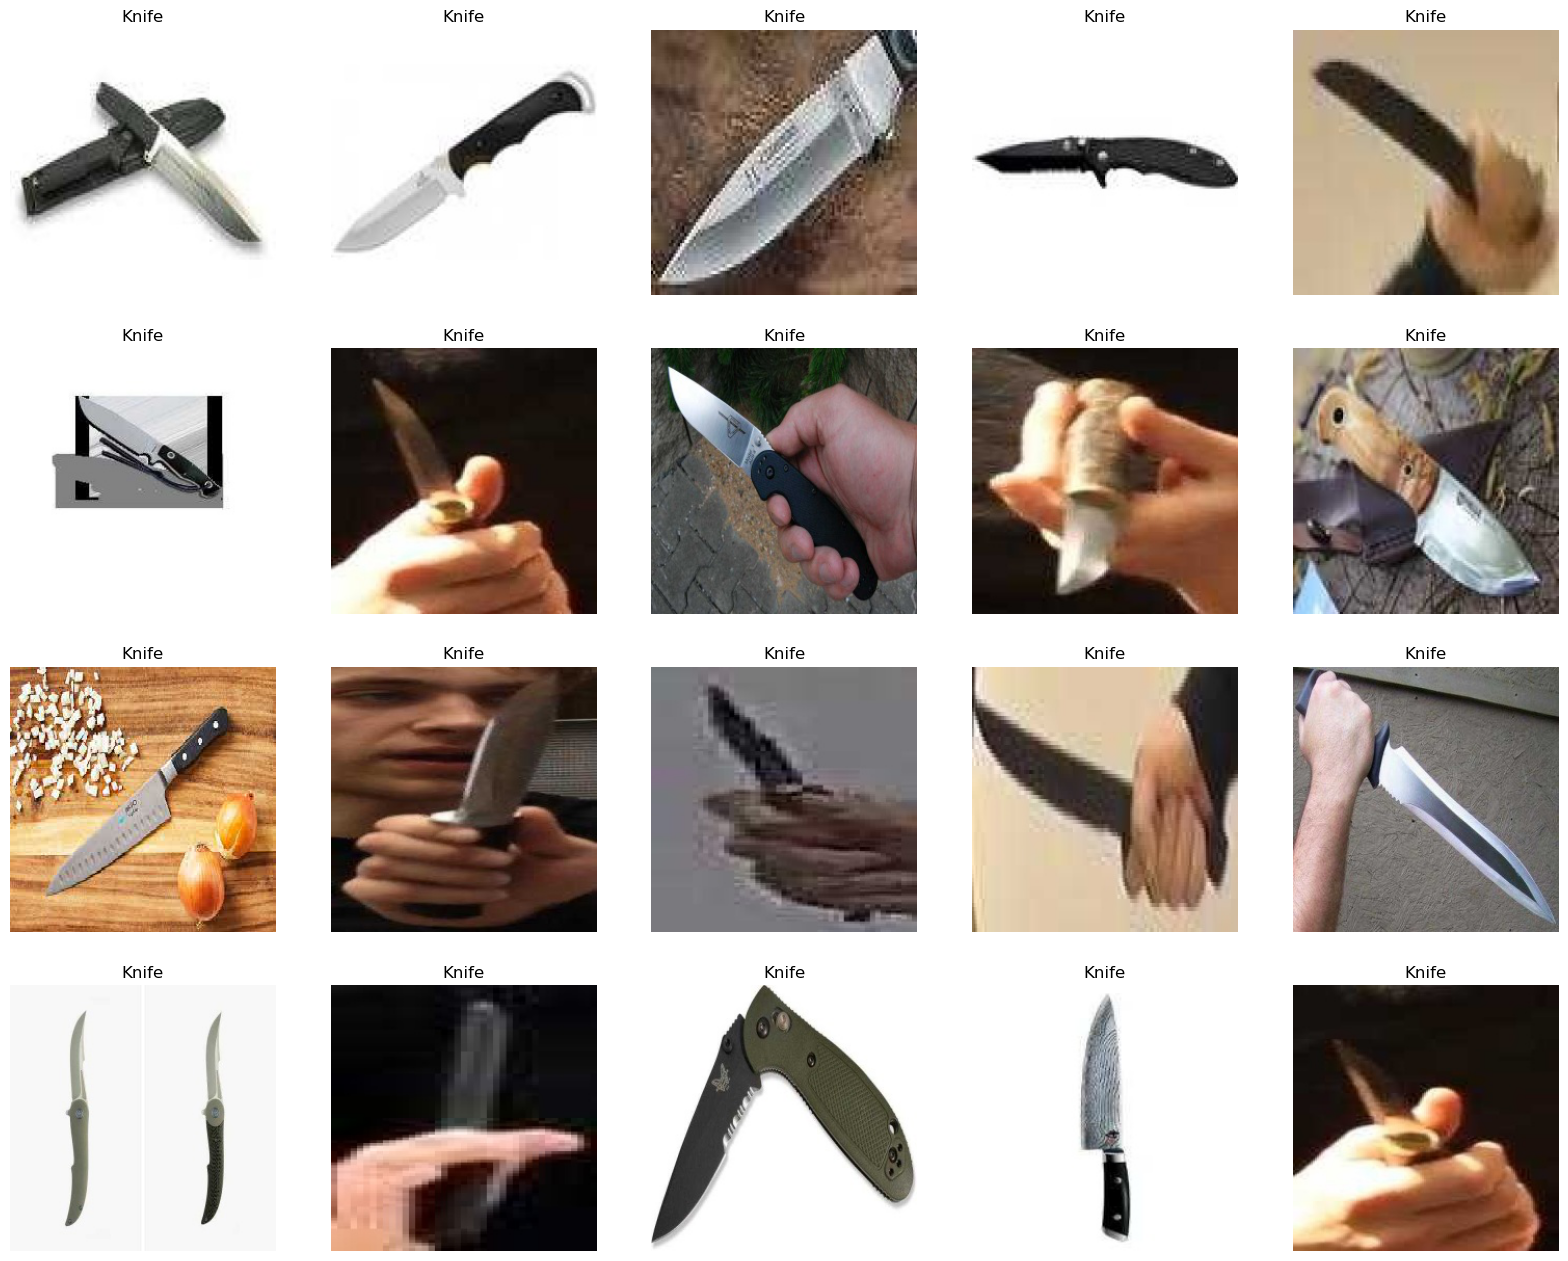

In [36]:
# Display the Images Grid
plt.figure(figsize=(20,20)) 
tem_gun = df[df['labels'] == 2]['images']# fetch the gun image from dataframe
start_index = random.randint(0, len(tem_gun) ) # generate random number between 0 and len(tem_gun)
files = tem_gun[start_index: start_index + 20] # select 20 images 


for index, file in enumerate(files):
    plt.subplot(5,5, index + 1)
    img = load_img(file, target_size=(256, 256)) # read image This is keras module 
    img = np.array(img) # converting img to numpy array
    plt.imshow(img)
    plt.title('Knife')
    plt.axis('off') # this will not show any x or y axis

In [37]:
df.columns

Index(['images', 'labels'], dtype='object')

In [38]:
df.dtypes

images    object
labels     int64
dtype: object

In [39]:
df['labels'].unique()

array([0, 2, 1], dtype=int64)

C:\Users\fahad\AppData\Local\Temp\ipykernel_13924\2492558885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['labels'].astype(str),  palette="Set2", legend=False)


<Axes: xlabel='labels', ylabel='count'>

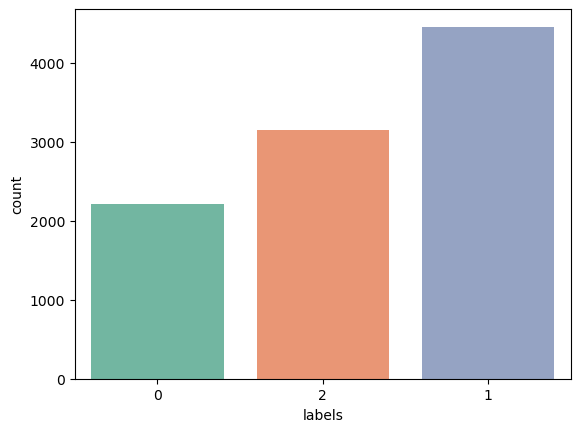

In [40]:
import seaborn as sns 
sns.countplot(x=df['labels'].astype(str),  palette="Set2", legend=False)

#### Creating a copy orignal dataFrame

In [41]:
df_copy =  df.copy()

### Adding a Additional column to the dataframe

In [42]:
df_copy['categories'] = df_copy['labels'].map({0: 'fire', 1: 'gun', 2: 'knife'})
df_copy.head()

images  labels categories
0  ../hod_classification_dataset/fire\U5GOX1W5QZH...       0       fire
1  ../hod_classification_dataset/knife\68NT6AU6QN...       2      knife
2    ../hod_classification_dataset/fire\fire.157.png       0       fire
3    ../hod_classification_dataset/fire\fire.627.png       0       fire
4  ../hod_classification_dataset/gun\HOIPAGBXT7FX...       1        gun

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


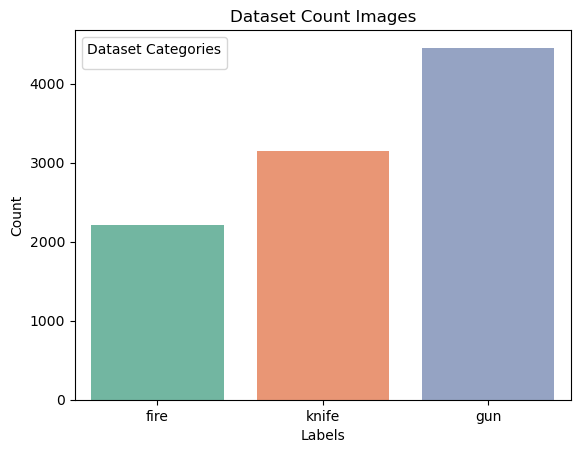

In [43]:
sns.countplot(x=df_copy['categories'].astype(str), hue=df_copy['categories'].astype(str),  palette="Set2")

# Set the labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Dataset Count Images')

# Display the legend
plt.legend(title='Dataset Categories')

plt.show()

In [44]:
# saving new data frame to excel
df.to_excel('./dataframe/new_hod.xlsx', index=False)

## *Data Augmentation*

#### *Creating image datagenrator for the images*

In [8]:
import tensorflow as tf

In [10]:
#importing modules
from  keras.preprocessing.image import ImageDataGenerator


#### *For training of data*
**Purpose:** To train a model

In [21]:
train_generator = ImageDataGenerator(
    rescale= 1./ 255, # normalization of images
    rotation_range=40, # augmentation of images
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_generator = ImageDataGenerator(rescale=1./255)
valid_generator = ImageDataGenerator(rescale=1./255)


In [27]:
df = pd.read_excel('./dataframe/hod.xlsx')

In [29]:
# Shuffle the dataframe so the images are in random order
df = df.sample(frac=1).reset_index(drop=True)
df.head(-5)

images  labels
0     D:\Final_semester_model\hod_classification_dat...       1
1     D:\Final_semester_model\hod_classification_dat...       0
2     D:\Final_semester_model\hod_classification_dat...       0
3     D:\Final_semester_model\hod_classification_dat...       2
4     D:\Final_semester_model\hod_classification_dat...       0
...                                                 ...     ...
9816  D:\Final_semester_model\hod_classification_dat...       2
9817  D:\Final_semester_model\hod_classification_dat...       1
9818  D:\Final_semester_model\hod_classification_dat...       1
9819  D:\Final_semester_model\hod_classification_dat...       0
9820  D:\Final_semester_model\hod_classification_dat...       1

[9821 rows x 2 columns]

In [36]:
len(df)

9826

#### *Spliting the data*

In [30]:
from sklearn.model_selection import train_test_split


In [51]:
train1, valid = train_test_split(df, test_size=0.2,random_state= 42)

In [52]:
print(len(train1))
print(len(valid))

7860
1966


In [61]:
train , test = train_test_split(train1, test_size=0.10,random_state= 42)


NameError: name 'train1' is not defined

In [54]:
# df files of train, test and validation
train.to_excel('./dataframe/train_hod.xlsx', index=False)
test.to_excel('./dataframe/test_hod.xlsx', index=False)
valid.to_excel('./dataframe/valid_hod.xlsx', index=False)

In [55]:
del(train1)

In [56]:
del(df)

In [63]:
print(len(train))
print(len(test))
print(len(valid))

7074
786
1966


In [66]:

print(train.dtypes)
print(test.dtypes)
print(valid.dtypes)

images    object
labels     int64
dtype: object
images    object
labels     int64
dtype: object
images    object
labels     int64
dtype: object


In [67]:
train['labels'] = train['labels'].astype('str')

In [69]:
test['labels'] = test['labels'].astype('str')
print(test.dtypes)

images    object
labels    object
dtype: object


In [70]:
valid['labels'] = valid['labels'].astype('str')
print(valid.dtypes)

images    object
labels    object
dtype: object


In [71]:
train_iterator  = train_generator.flow_from_dataframe(
    dataframe=train,
    x_col='images',
    y_col='labels',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='sparse',
    batch_size=32,
    shuffle=True
)



Found 7074 validated image filenames belonging to 3 classes.


In [72]:
test_iterator = test_generator.flow_from_dataframe(
    dataframe=test,
    x_col='images',
    y_col='labels',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='sparse',
    batch_size=32,
    shuffle=True
)

valid_iterator = valid_generator.flow_from_dataframe(
    dataframe=valid,
    x_col='images',
    y_col='labels',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='sparse',
    batch_size=32,
    shuffle=True
)

Found 786 validated image filenames belonging to 3 classes.
Found 1966 validated image filenames belonging to 3 classes.


In [77]:
classes = list(train_iterator.class_indices)
classes

['0', '1', '2']

#### Generator for taining images 

In [13]:
# Define parameters for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255, # normalize pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25 # 20% of data for validation
)

# Specify the directory containing your dataset
train_dir = dataset_path

# Generate batches of augmented data for training
train_iterator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200), # resize images to 150x150
    batch_size=512,
    class_mode='categorical', # for multi-class classification
    subset='training' # specify that this is for training
)

# Generate batches of augmented data for validation
validation_iterator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=512,
    class_mode='categorical',
    subset='validation' # specify that this is for validation
)

Found 7371 images belonging to 3 classes.
Found 2455 images belonging to 3 classes.


In [14]:
train_iterator.class_indices

{'fire': 0, 'gun': 1, 'knife': 2}

## *Model Creation*

In [22]:
import keras
from keras.callbacks import ModelCheckpoint

In [24]:
# Building a CNN model architecture
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=2, input_shape=[200, 200, 3]), 
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(1,1)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.2),
                                    keras.layers.Flatten(), # neural network building  starts here
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.2),
                                    keras.layers.Dense(units=128, activation='relu'),
                                    keras.layers.Dense(units=3, activation='softmax') # output layer
])


In [25]:
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 199, 199, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 98, 98, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 96, 96, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 46, 46, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 135424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    17,334,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,778,403 (67.82 MB)

 Trainable params: 17,778,403 (67.82 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from keras.utils import plot_model

In [28]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [27]:
plot_model(cnn_model, to_file='Cnn_model_summary.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


#### specifing callback function

In [31]:
# save best model using vall accuracy
model_path = '../model/April_new_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [32]:
# compile cnn model
cnn_model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# train cnn model
history = cnn_model.fit(train_iterator,
                        epochs=25,
                        verbose=1,
                        validation_data= validation_iterator,
                        callbacks=callbacks_list
                       ) # time start 14.25

Epoch 1/25
15/15 [==============================] - ETA: 0s - loss: 4.2479 - accuracy: 0.4170 
Epoch 1: val_accuracy improved from -inf to 0.56782, saving model to ../model\April_new_model.h5


c:\Users\fahad\miniconda3\envs\notebook\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 626s 41s/step - loss: 4.2479 - accuracy: 0.4170 - val_loss: 0.9197 - val_accuracy: 0.5678
Epoch 2/25
15/15 [==============================] - ETA: 0s - loss: 0.9827 - accuracy: 0.5613 
Epoch 2: val_accuracy improved from 0.56782 to 0.64440, saving model to ../model\April_new_model.h5
15/15 [==============================] - 525s 35s/step - loss: 0.9827 - accuracy: 0.5613 - val_loss: 0.7264 - val_accuracy: 0.6444
Epoch 3/25
15/15 [==============================] - ETA: 0s - loss: 0.7766 - accuracy: 0.6380 
Epoch 3: val_accuracy improved from 0.64440 to 0.74990, saving model to ../model\April_new_model.h5
15/15 [==============================] - 522s 36s/step - loss: 0.7766 - accuracy: 0.6380 - val_loss: 0.6251 - val_accuracy: 0.7499
Epoch 4/25
15/15 [==============================] - ETA: 0s - loss: 0.6987 - accuracy: 0.6895 
Epoch 4: val_accuracy improved from 0.74990 to 0.75234, saving model to ../model\April_new_model.h5
15/15 [===============

#### *plotting*

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

#### *plot the Training Accuracy and Validation Accuracy*


<Figure size 640x480 with 0 Axes>

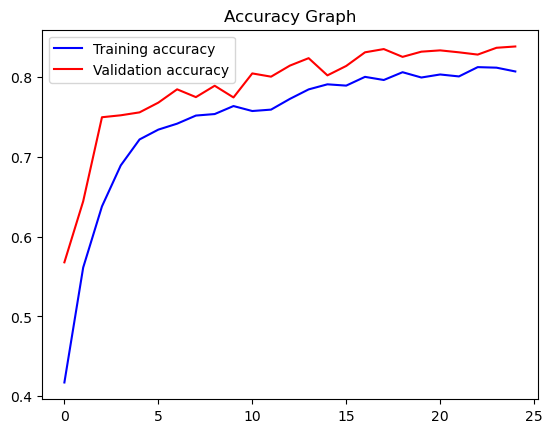

<Figure size 640x480 with 0 Axes>

In [35]:
plt.plot(epochs, acc,'b',label='Training accuracy')
plt.plot(epochs, val_acc,'r',label='Validation accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

#### *Plotting the Traing loss and Validation loss*

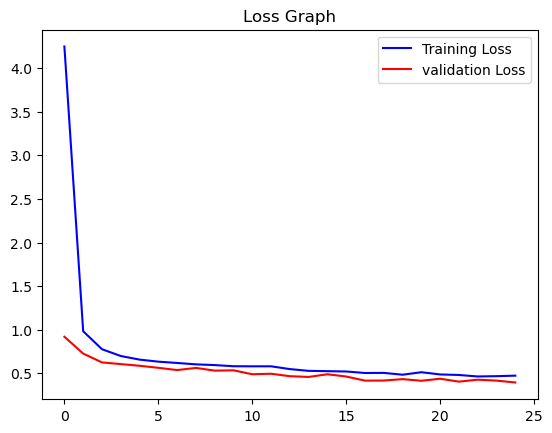

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss,'b',label='Training Loss')
plt.plot(epochs, val_loss,'r',label='validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

## Testing and Evaluating


In [3]:
import keras
from keras.optimizers import Adam

In [4]:
model = keras.models.load_model('../model/April_new_model.h5')

c:\Users\fahad\miniconda3\envs\note\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [48]:
prediction = model.predict(validation_iterator)
prediction

5/5 [==============================] - 63s 12s/step


In [49]:
print(model.evaluate(validation_iterator))

5/5 [==============================] - 63s 12s/step - loss: 0.3980 - accuracy: 0.8326
[0.39797812700271606, 0.8325865864753723]


In [50]:
y_pred = np.argmax(prediction, axis=1)
y_pred


array([1, 2, 2, ..., 1, 0, 1], dtype=int64)

In [55]:
true_label = validation_iterator.classes
true_label

array([0, 0, 0, ..., 2, 2, 2])

In [57]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,recall_score,f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
list_of_classes = list(validation_iterator.class_indices.keys())
list_of_classes

['fire', 'gun', 'knife']

#### *Classification report*

In [59]:
print(classification_report(true_label, y_pred, target_names=list_of_classes))

              precision    recall  f1-score   support

        fire       0.25      0.26      0.25       554
         gun       0.44      0.43      0.44      1113
       knife       0.31      0.31      0.31       788

    accuracy                           0.35      2455
   macro avg       0.33      0.33      0.33      2455
weighted avg       0.36      0.35      0.35      2455



### *Confusion MAtrix*

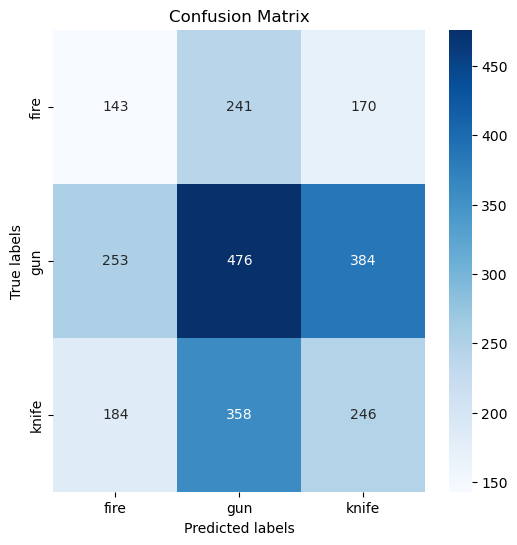

In [61]:
# Generate confusion matrix
cm = confusion_matrix(true_label, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list_of_classes, yticklabels=list_of_classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(true_label, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(true_label, y_pred, average='weighted')
recall = recall_score(true_label, y_pred, average='weighted')
f1 = f1_score(true_label, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.35234215885947046
Precision: 0.35508175221345895
Recall: 0.35234215885947046
F1 Score: 0.3536168263718905


# Another test

In [15]:
path = 'D:\model_with_jupyter\datasets_test\datasets_test'

In [16]:
test_img = ImageDataGenerator(rescale=1./255)

test2_iterator = test_img.flow_from_directory( train_dir,
    target_size=(200, 200),
    batch_size=512,
    class_mode='categorical',
    )

Found 9826 images belonging to 3 classes.


In [17]:
test2_iterator.class_indices

{'fire': 0, 'gun': 1, 'knife': 2}

In [18]:
predictions = model.predict(test2_iterator)
predictions

20/20 [==============================] - 252s 13s/step


array([[0.01075064, 0.47154927, 0.5177001 ],
       [0.00908229, 0.09378556, 0.89713216],
       [0.00822031, 0.89333254, 0.0984471 ],
       ...,
       [0.12379585, 0.41634706, 0.45985708],
       [0.32710835, 0.5880238 , 0.08486785],
       [0.00775016, 0.28676137, 0.7054885 ]], dtype=float32)

In [19]:
print(model.evaluate(test2_iterator, verbose =1))

20/20 [==============================] - 250s 13s/step - loss: 0.3678 - accuracy: 0.8604
[0.36781951785087585, 0.8603704571723938]


In [ ]:
predictions = model.predict(valid_iterator)

In [38]:
y_predict = np.argmax(predictions, axis=1)
y_predict


array([2, 2, 1, ..., 2, 1, 2], dtype=int64)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
true_labels = test2_iterator.classes
true_labels

array([0, 0, 0, ..., 2, 2, 2])

In [41]:
class_labels = list(test2_iterator.class_indices.keys())
class_labels

['fire', 'gun', 'knife']

In [42]:
print(classification_report(true_labels, y_predict, target_names=class_labels))

              precision    recall  f1-score   support

        fire       0.23      0.24      0.23      2217
         gun       0.45      0.47      0.46      4455
       knife       0.32      0.27      0.29      3154

    accuracy                           0.36      9826
   macro avg       0.33      0.33      0.33      9826
weighted avg       0.36      0.36      0.36      9826



In [44]:
import seaborn as sns

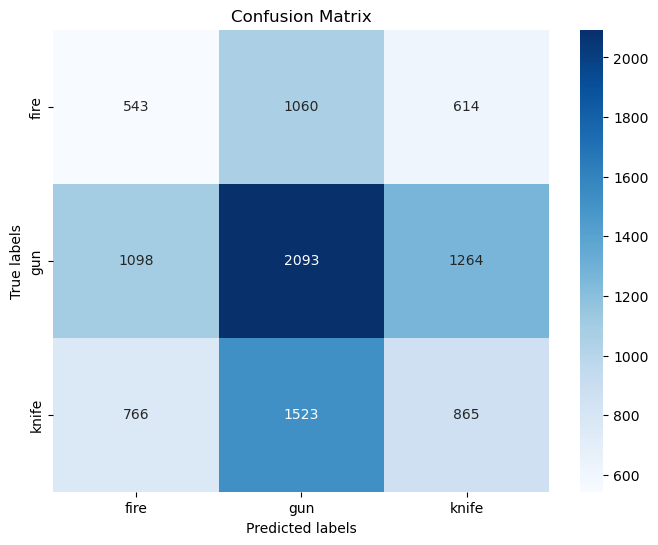

In [45]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(true_labels, y_predict)

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, y_predict, average='weighted')
recall = recall_score(true_labels, y_predict, average='weighted')
f1 = f1_score(true_labels, y_predict, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.3562996132709139
Precision: 0.35506054856761626
Recall: 0.3562996132709139
F1 Score: 0.3550089713359526


In [ ]:
form keras.utils import model